In [2]:
import pandas as pd

# Specify the data types for the columns
dtypes = {
    'INC NUMBER': 'str',
    'OCCURRED ON': 'str',
    'OCCURRED TO': 'str',
    'UCR CRIME CATEGORY': 'str',
    '100 BLOCK ADDR': 'str',
    'ZIP': 'float',
    'PREMISE TYPE': 'str',
    'GRID': 'str'
}

# Read the CSV file with specified data types
crime_data = pd.read_csv('./Resources/Crime-data.csv', dtype=dtypes)

# Drop rows with missing 'ZIP' values
crime_data = crime_data.dropna(subset=['ZIP'])

# Remove decimal points from the 'ZIP' column
crime_data['ZIP'] = crime_data['ZIP'].astype(int)

# Display the dataframe
crime_data.head(10)

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID
0,201700001603695,11/01/2015 00:00,03/31/2016 00:00,RAPE,38XX W CAMELBACK RD,85019,HOSPITAL,BI20
1,201700001722914,11/01/2015 00:00,NaN,LARCENY-THEFT,279XX N 23RD LN,85085,SINGLE FAMILY HOUSE,FA23
2,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014,PARKING LOT,BI30
3,201600000527709,11/01/2015 00:00,03/22/2016 00:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017,PARKING LOT,BJ21
4,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE,DA19
5,201500002103724,11/01/2015 00:00,11/01/2015 15:21,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031,APARTMENT,BH16
6,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043,SINGLE FAMILY HOUSE,AF12
7,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307,SINGLE FAMILY HOUSE,BJ04
8,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014,APARTMENT,BJ30
9,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006,SINGLE FAMILY HOUSE,BD30


In [3]:
#Create a dataframe that shows Zip Code, Types of Crime, and the number of crimes
crime_data_grouped = crime_data.groupby(['ZIP', 'UCR CRIME CATEGORY']).size().reset_index(name='CRIME COUNT')
crime_data_grouped.head(10)



,ZIP,UCR CRIME CATEGORY,CRIME COUNT
0,85003,AGGRAVATED ASSAULT,857
1,85003,ARSON,107
2,85003,BURGLARY,830
3,85003,DRUG OFFENSE,885
4,85003,LARCENY-THEFT,3951
5,85003,MOTOR VEHICLE THEFT,743
6,85003,MURDER AND NON-NEGLIGENT MANSLAUGHTER,18
7,85003,RAPE,328
8,85003,ROBBERY,320
9,85004,AGGRAVATED ASSAULT,769


In [4]:
# Based on the crime_data_grouped dataframe, calculate the top 10 zip codes with the highest crime rate
top_10_zips = crime_data_grouped.groupby(['ZIP'])['CRIME COUNT'].sum().reset_index()
top_10_zips = top_10_zips.sort_values('CRIME COUNT', ascending=False).groupby('ZIP').head(10).reset_index(drop=True)
top_10_zips = top_10_zips.rename(columns={'ZIP': 'Zip', 'CRIME COUNT': 'Total Crimes'})
top_10_zips.head(10)

,Zip,Total Crimes
0,85015,28953
1,85008,27435
2,85051,25837
3,85009,25491
4,85041,24215
5,85017,22772
6,85035,21890
7,85043,20911
8,85021,19836
9,85029,18196


In [5]:
# Based on the crime_data_grouped dataframe, calculate the Top 10 zip codes with the lowest crime rate
bottom_10_zips = crime_data_grouped.groupby(['ZIP'])['CRIME COUNT'].sum().reset_index()
bottom_10_zips = bottom_10_zips[bottom_10_zips['CRIME COUNT'] > 1]
bottom_10_zips = bottom_10_zips.sort_values('CRIME COUNT', ascending=True).groupby('ZIP').head(10).reset_index(drop=True)
bottom_10_zips = bottom_10_zips.rename(columns={'ZIP': 'Zip', 'CRIME COUNT': 'Total Crimes'})
bottom_10_zips.head(10)

,Zip,Total Crimes
0,85268,2
1,85337,2
2,85284,2
3,85340,2
4,85351,2
5,85242,2
6,85388,2
7,85374,2
8,85381,3
9,85248,3


# Top 10 Zip Codes with Highest Crime Rate

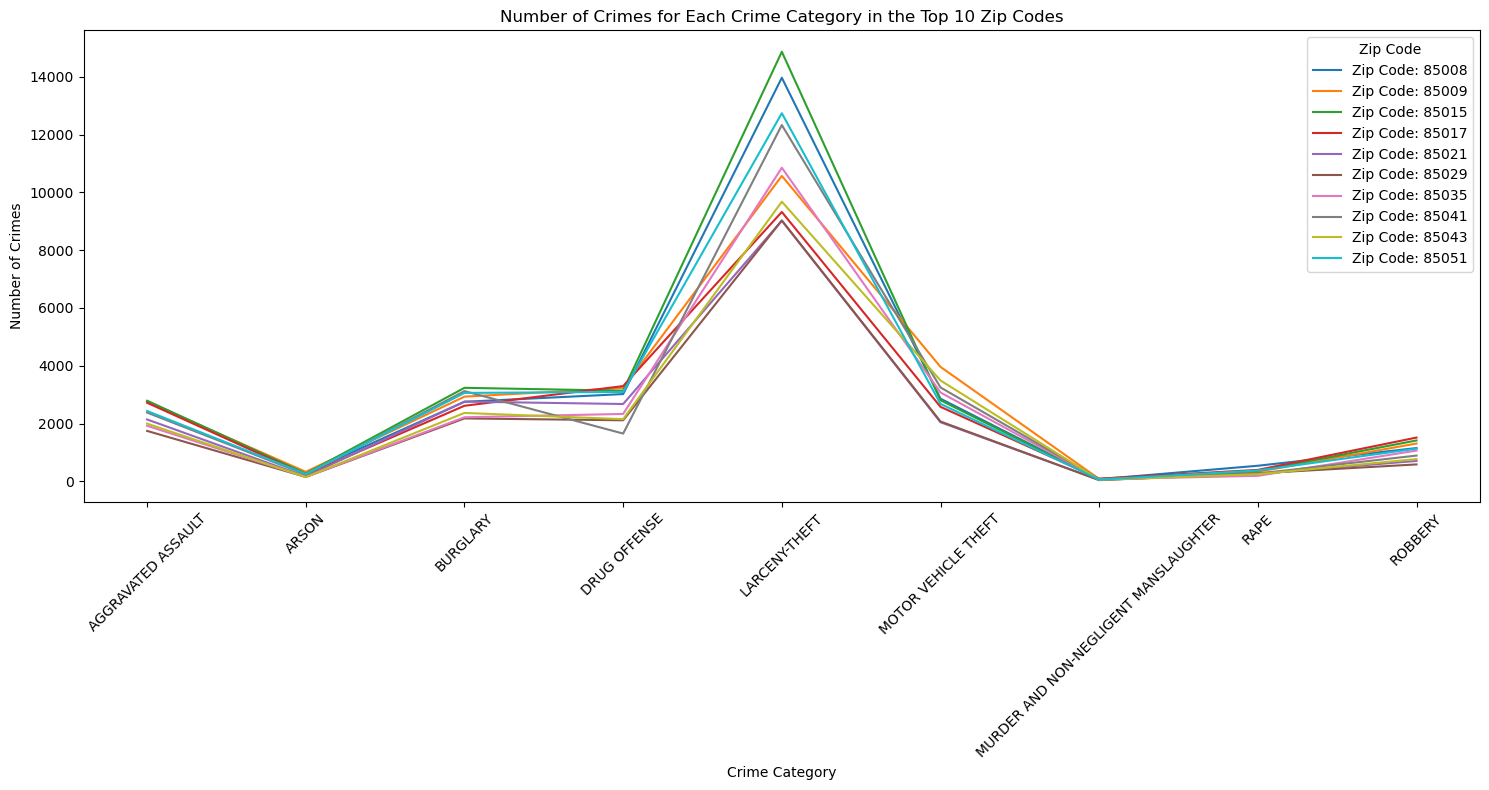

In [52]:
import matplotlib.pyplot as plt

# Create a graph that shows the number of crimes for each crime category in the Top 10 Zip Codes
top_10_zip_codes = top_10_zips['Zip'].tolist()
top_10_zip_codes_crime_data = crime_data[crime_data['ZIP'].isin(top_10_zip_codes[:10])]

# Group the data by 'ZIP' and 'UCR CRIME CATEGORY'
top_10_zip_codes_grouped = top_10_zip_codes_crime_data.groupby(['ZIP', 'UCR CRIME CATEGORY']).size().reset_index(name='CRIME COUNT')

# Plot the number of crimes for each crime category in the Top 10 Zip Codes
plt.figure(figsize=(15, 8))
for zip_code in top_10_zip_codes_grouped['ZIP'].unique():
    data = top_10_zip_codes_grouped[top_10_zip_codes_grouped['ZIP'] == zip_code]
    plt.plot(data['UCR CRIME CATEGORY'], data['CRIME COUNT'], label=f'Zip Code: {zip_code}')

plt.title('Number of Crimes for Each Crime Category in the Top 10 Zip Codes')
plt.xlabel('Crime Category')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Zip Code', loc='upper right')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('./Resources/Top_10_Zip_Codes_Crime_Categories.png')

# Show the plot
plt.show()

Analysis: 

In [37]:
import plotly.express as px

# Create a line plot
fig = px.line(top_10_zip_codes_grouped,
              x='UCR CRIME CATEGORY',  # Set the x-axis to the crime category
              y='CRIME COUNT',         # Set the y-axis to the crime count
              color='ZIP',             # Differentiate lines by ZIP code
              title='Number of Crimes for Each Crime Category in the Top 10 Zip Codes',  # Set the title of the plot
              labels={'UCR CRIME CATEGORY': 'Type of Crime', 'CRIME COUNT': 'Total Crimes', 'ZIP': 'Zip Code'},  # Set axis labels
              markers=True)            # Add markers to the lines

# Set the color palette for the plot
colors = px.colors.qualitative.Plotly

# Update the line width for better visibility
fig.update_traces(line=dict(width=2))


# Display the plot
fig.show()

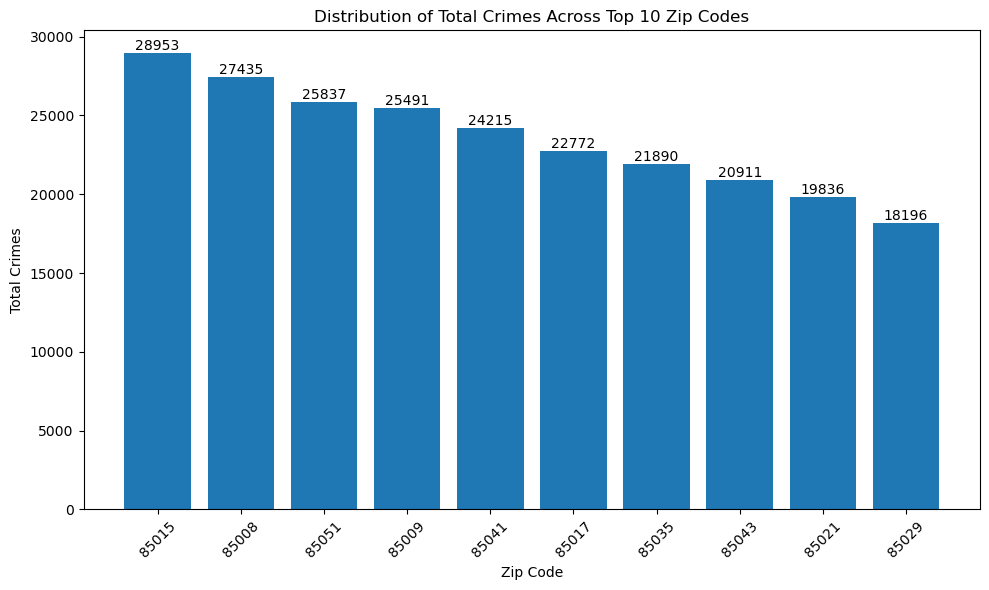

In [51]:
# Ensure the ZIP column does not have decimals
top_10_zips.loc[:, 'Zip'] = top_10_zips['Zip'].astype(int)

# Filter to include only the top 10 zip codes
top_10_zips_filtered = top_10_zips.head(10)

# Sort the dataframe by 'Total Crimes' in descending order
top_10_zips_filtered = top_10_zips_filtered.sort_values(by='Total Crimes', ascending=False)

# Create a bar chart of the total crimes across the top 10 zip codes
plt.figure(figsize=(10, 6))

# Use the index of the sorted DataFrame to define the order of the bars
bars = plt.bar(top_10_zips_filtered.index, top_10_zips_filtered['Total Crimes'])

plt.title('Distribution of Total Crimes Across Top 10 Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Total Crimes')

# Use the sorted Zip values for x-axis labels
plt.xticks(top_10_zips_filtered.index, top_10_zips_filtered['Zip'], rotation=45)

# Add text annotations to show the total at the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()

# Save the plot as an image file
plt.savefig('./Resources/Top_10_Zip_Codes_Crime_Distribution.png')

# Show the plot
plt.show()